In [1]:
library("Seurat")
#library("Seurat")
library(magrittr)
library(cowplot)
library(ggplot2)
library(Signac)
library(patchwork)
set.seed(1234)
library(magrittr)
library(cowplot)
library(metap)
library(dplyr)
library(future)

Registered S3 method overwritten by 'spatstat.core':
  method          from
  formula.glmmPQL MASS

Attaching SeuratObject

Attaching sp

Warning message:
“package ‘magrittr’ was built under R version 4.1.3”
Warning message:
“package ‘ggplot2’ was built under R version 4.1.3”

Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots


Warning message:
“package ‘dplyr’ was built under R version 4.1.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘future’ was built under R version 4.1.3”


In [2]:
#ids.reversed = TRUE

se_f = "/data/Mito_Trace/output/aggregate/CHIP_aggr/v04/data/annotation/gff_A2/mergedSamples/allSamples.integrated.rds" 
outdir = "/data/Mito_Trace/output/aggregate/CHIP_aggr/v04/data/annotation/gff_A2/mergedSamples"


In [3]:
se <- readRDS(se_f)
se[[]]

,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,passed_filters,⋯,TSS.percentile,pct_reads_in_peaks,blacklist_ratio,high.tss,nucleosome_group,ATAC_snn_res.0.8,seurat_clusters,nCount_ATAC_log2,nCount_RNA,nFeature_RNA
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<fct>,<dbl>,<dbl>,<int>
cd34norm_Flt3l_AAACGAAAGAGCTCCC-1,Flt3l,5219,5219,25798,3956,111,95,1643,4740,15253,⋯,0.46,30.59726,0,High,NS < 4,5,5,12.34983,8908,5567
cd34norm_Flt3l_AAACGAAAGCGATACG-1,Flt3l,2350,2350,18340,2478,78,92,794,9325,5573,⋯,0.62,38.07644,0,High,NS < 4,3,3,11.19906,3006,2472
cd34norm_Flt3l_AAACGAAAGGCTTCGC-1,Flt3l,4322,4322,28417,4398,132,122,1771,10224,11770,⋯,0.30,32.71878,0,High,NS < 4,2,2,12.07782,6521,4620
cd34norm_Flt3l_AAACGAAAGTACAACA-1,Flt3l,1542,1542,12018,1524,60,45,585,5688,4116,⋯,0.06,32.28863,0,High,NS < 4,5,5,10.59152,2356,1996
cd34norm_Flt3l_AAACGAACAACGTACT-1,Flt3l,3251,3251,37690,3034,82,125,1680,24974,7795,⋯,0.69,37.78063,0,High,NS < 4,1,1,11.66711,4275,3340
cd34norm_Flt3l_AAACGAACAAGCGGTA-1,Flt3l,1488,1488,9381,1416,44,50,547,3616,3708,⋯,0.22,34.49299,0,High,NS < 4,5,5,10.54013,2150,1864
cd34norm_Flt3l_AAACGAACACCTGGTG-1,Flt3l,3107,3107,30421,5698,112,157,1762,14034,8658,⋯,0.63,31.17348,0,High,NS < 4,8,8,11.60177,5338,3881
cd34norm_Flt3l_AAACGAACACGATATC-1,Flt3l,2626,2626,15245,1960,89,32,737,5330,7097,⋯,0.11,32.04171,0,High,NS < 4,4,4,11.35920,4225,3237
cd34norm_Flt3l_AAACGAACACTTACAG-1,Flt3l,10897,10897,48515,10680,240,158,2715,12096,22626,⋯,0.36,47.67966,0,High,NS < 4,15,15,13.41178,13471,7325


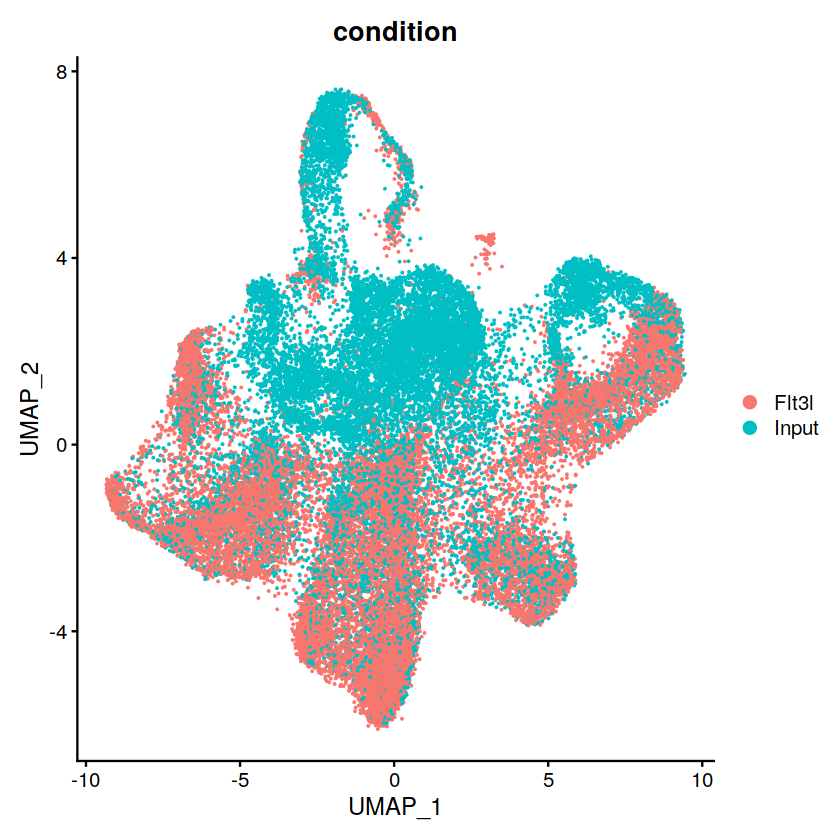

In [4]:
p1 <- DimPlot(se, group.by = "proj") + 
              ggtitle("condition")

ggsave(filename = file.path(outdir,"umap.conditions.svg"), plot = p1, height=16, width=16)

p1
#ggsave(file.path(outdir, "integrated.nuclear.clusters.png"), pclust)
#ggsave(file.path(outdir,"se.batch.png"), dpi=300)

#ggsave(file.path(outdir,"se.merged.compare.svg"), dpi=300)

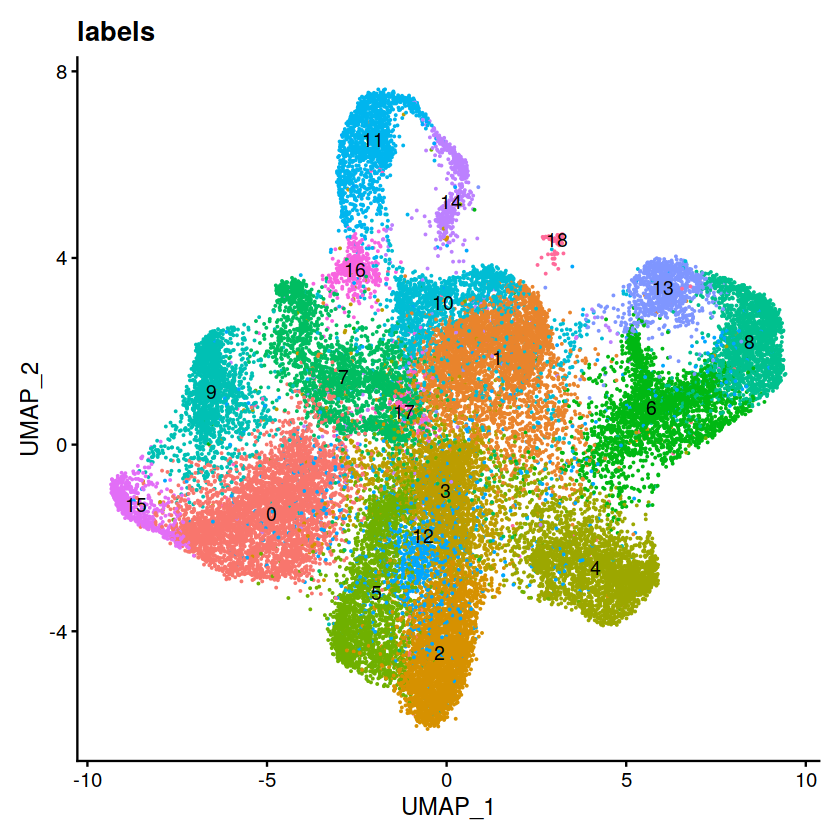

In [5]:
pclust <- DimPlot(object = se, label = TRUE) + NoLegend() + ggtitle("labels")
pclust
ggsave(plot = pclust, filename =  file.path(outdir,"umap.clusters.svg"), width = 16, height = 16)